# Deep Learning II

## Table of contents

1. CNN (Convolutional neural network)

2. Pooling

3. Recurrent Neural Networks

## 3. CNN (Convolutional neural network)

Lets understand the convolution operation

https://www.youtube.com/watch?v=yb2tPt0QVPY&ab_channel=LearnOpenCV

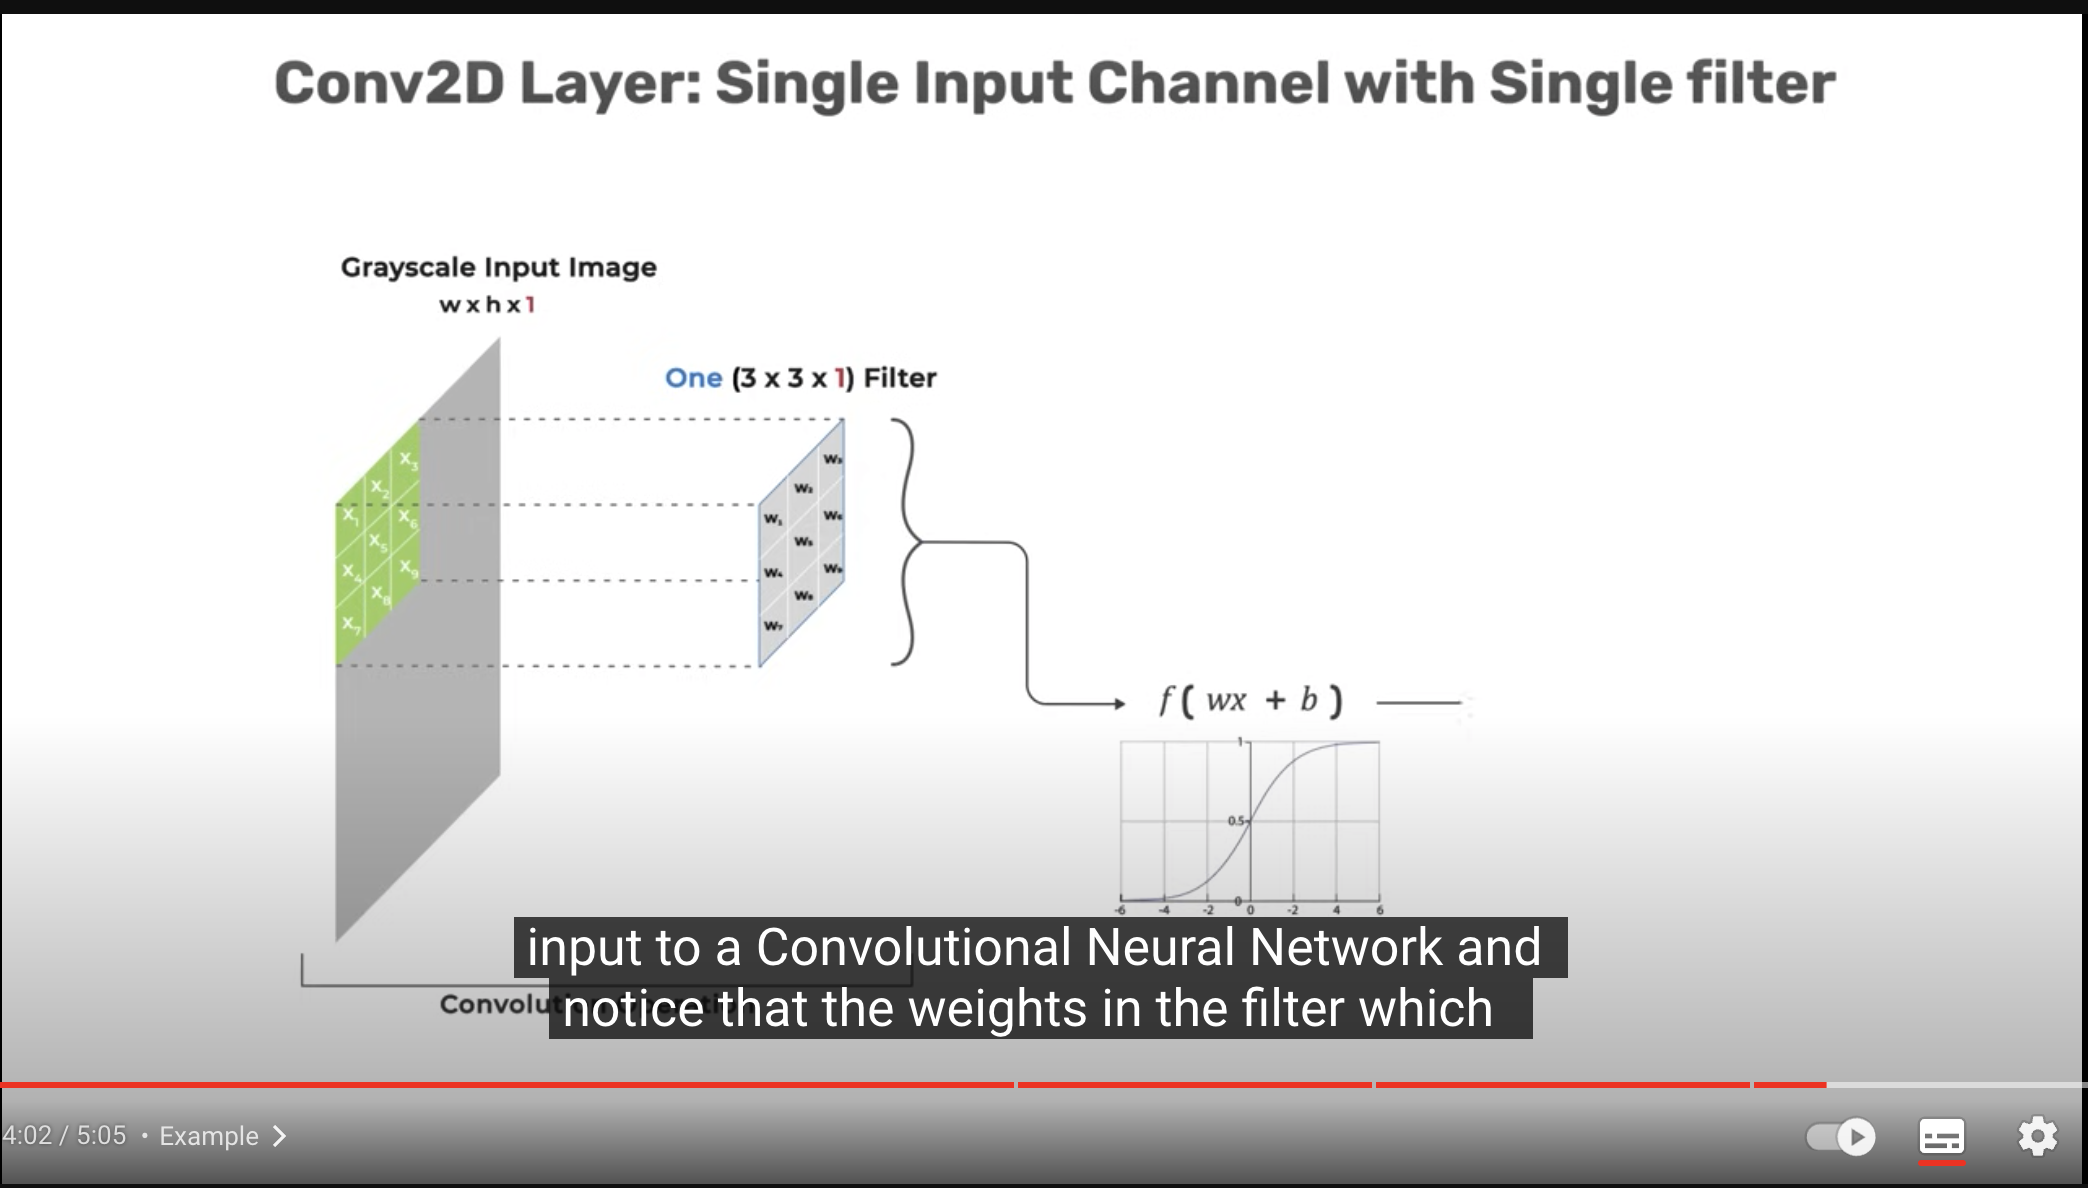

The previously mentioned multilayer perceptrons represent the most general and powerful feedforward neural network model possible; they are organised in layers, such that every neuron within a layer receives its own copy of all the outputs of the previous layer as its input. This kind of model is perfect for the right kind of problem – learning from a fixed number of (more or less) unstructured parameters.

> However, consider what happens to the number of parameters (weights) of such a model when being fed raw image data (f.e. a $200 \times 200$ pixel image connected to 1024 neurons).

In [1]:
200 * 200 * 1024

40960000

The situation quickly becomes unmanageable as image sizes grow larger, way before reaching the kind of images people usually want to work with in real applications.

A common solution is to downsample the images to a size where MLPs can safely be applied. However, if we directly downsample the image, we potentially lose a wealth of information; it would be great if we would somehow be able to still do some useful (without causing an explosion in parameter count) processing of the image, prior to performing the downsampling.

It turns out that there is a very efficient way of pulling this off, and it makes advantage of the structure of the information encoded within an image – it is assumed that pixels that are spatially closer together will "cooperate" on forming a particular feature of interest much more than ones on opposite corners of the image. Also, if a particular (smaller) feature is found to be of great importance when defining an image's label, it will be equally important if this feature was found anywhere within the image, regardless of location.

Enter the convolution operator. Given a two-dimensional image, $I$, and a small matrix, $K$ of size $h \times w$, (known as a convolution kernel), which we assume encodes a way of extracting an interesting image feature, we compute the convolved image, $I∗K$, by overlaying the kernel on top of the image in all possible ways, and recording the sum of elementwise products between the image and the kernel:

$$
output(x,y) = (I \otimes K)(x,y) = \sum_{m=0}^{M-1} \sum_{n=1}^{N-1} K(m,n) I(x-n, y-m)
$$

The convolution operator forms the fundamental basis of the convolutional layer of a CNN. The layer is completely specified by a certain number of kernels, $K$, and it operates by computing the convolution of the output images of a previous layer with each of those kernels, afterwards adding the biases (one per each output image). Finally, an activation function, $\sigma$, may be applied to all of the pixels of the output images. 

Typically, the input to a convolutional layer will have $d$ channels (e.g., red/green/blue in the input layer), in which case the kernels are extended to have this number of channels as well.

Note that, since all we're doing here is addition and scaling of the input pixels, the kernels may be learned from a given training dataset via gradient descent, exactly as the weights of an MLP. In fact, an MLP is perfectly capable of replicating a convolutional layer, but it would require a lot more training time (and data) to learn to approximate that mode of operation.

https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2



In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10


/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8875 - loss: 0.3834 - val_accuracy: 0.9802 - val_loss: 0.0702
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9834 - loss: 0.0565 - val_accuracy: 0.9860 - val_loss: 0.0523
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 0.9850 - val_loss: 0.0575
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9948 - loss: 0.0176 - val_accuracy: 0.9860 - val_loss: 0.0578
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9970 - loss: 0.0105 - val_accuracy: 0.9860 - val_loss: 0.0610
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9983 - loss: 0.0074 - val_accuracy: 0.9867 - val_loss: 0.0671
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 0.9867 - val_loss: 0.0593
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.987

## 3.1. CNN: Pooling

[Pooling](https://www.youtube.com/watch?v=KKmCnwGzSv8&ab_channel=IntuitiveML)

In fact, after a convolutional layer there are two kinds of non linear functions that are usually applied: non-linear activation functions such as sigmoids or ReLU and **pooling**. Pooling layers are used with the purpose to progressively reduce the spatial size of the image to achieve scale invariance. The most common layer is the *maxpool* layer. Basically a maxpool of $2 \times 2$ causes a filter of 2 by 2 to traverse over the entire input array and pick the largest element from the window to be included in the next representation map. Pooling can also be implemented by using other criteria, such as averaging instead of taking the max element. 

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,570 (400.66 KB)

 Trainable params: 102,570 (400.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.8027 - loss: 0.6146 - val_accuracy: 0.9800 - val_loss: 0.0688
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9791 - loss: 0.0678 - val_accuracy: 0.9885 - val_loss: 0.0402
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9867 - loss: 0.0432 - val_accuracy: 0.9893 - val_loss: 0.0399
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9922 - val_loss: 0.0273
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9910 - val_loss: 0.0362
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9922 - val_loss: 0.0299
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9913 - val_loss: 0.0343
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9964 - loss: 0.0105 - 

## 4. Recurrent Neural Networks

[Learn about RNN](https://www.youtube.com/watch?v=SjfDbtB23vQ&ab_channel=deeplizard)


Classical neural networks, including convolutional ones, suffer from two severe limitations:

+ They only accept a fixed-sized vector as input and produce a fixed-sized vector as output.
+ They do not consider the sequential nature of some data (language, video frames, time series, etc.) 

Recurrent neural networks (RNN) overcome these limitations by allowing to operate over sequences of vectors (in the input, in the output, or both). RNNs are called recurrent because they perform the same task for every element of the sequence, with the output depending on the previous computations. The basic formulas of a simple RNN are:

$$ s_t = f_1 (Ux_t + W s_{t-1}) $$
$$ y_t = f_2 (V s_t) $$

These equations basically say that the current network state, commonly known as hidden state, $s_t$ is a function $f_1$ of the previous hidden state $s_{t-1}$ and the current input $x_t$. $U, V, W$ matrices are the parameters of the function. 

Given an input sequence, we apply RNN formulas in a recurrent way until we process all input elements. The RNN shares the parameters  $U,V,W$ across all recurrent steps. We can think of the hidden state  as a memory of the network that captures information about the previous steps.

The novelty of this type of network is that we we have encoded in the very architecture of the network a sequence modeling scheme that has been in used in the past to predict time series as well as to model language. In contrast to the precedent architectures we have introduced, now the hidden layers are indexed by both 'spatial' and 'temporal' index. 

The inputs of a recurrent network are always vectors, but we can process sequences of symbols/words by representing these symbols by numerical vectors.

Let's suppose we want to classify a phrase or a series of words. Let $x^1, ...,x^{C}$ the word vectors corresponding to a corpus with $C$ symbols. Then, the relationship to compute the hidden layer output features at each time-step $t$ is $h_t = \sigma(W s_{t-1} + U x_{t})$, where:

+ $x_{t} \in \mathbf{R}^{d}$ is input word vector at time $t$. 
+ $U \in \mathbf{R}^{D_h \times d}$ is the weights matrix of the input word vector, $x_t$.
+ $W \in \mathbf{R}^{D_h \times D_h}$ is the weights matrix of the output of the previous time-step, $t-1$.
+ $s_{t-1}  \in \mathbf{R}^{D_h}$ is the output of the non-linear function at the previous time-step, $t-1$. 
+ $\sigma ()$ is the non-linearity function (normally, ``tanh``).


The output of this network is $\hat{y}_t = softmax (V h_t)$, that represents the output probability distribution over the vocabulary at each time-step $t$.  

Essentially, $\hat{y}_t$ is the next predicted word given the document context score so far (i.e. $h_{t-1}$) and the last observed word vector $x^{(t)}$. 

The loss function used in RNNs is often the cross entropy error:

$
	L^{(t)}(W) = - \sum_{j=1}^{|V|} y_{t,j} \times log (\hat{y}_{t,j})
$

The cross entropy error over a corpus of size $C$ is:

$
	L = \frac{1}{C} \sum_{c=1}^{C} L^{(c)}(W) = - \frac{1}{C} \sum_{c=1}^{C} \sum_{j=1}^{|V|} y_{c,j} \times log (\hat{y}_{c,j})
$

These simple RNN architectures have been shown to be too prone to forget information when sequences are long and they are also very unstable when trained. For this reason several alternative architectures have been proposed. These alternatives are based on the presence of *gated units*. Gates are a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation. The two most important alternative RNN are Long Short Term Memories (LSTM) and Gated Recurrent Units (GRU) networks. 

In [4]:
'''Example script to generate text from Nietzsche's writings.
At least 20 epochs are required before the generated text
starts sounding coherent.
It is recommended to run this script on GPU, as recurrent
networks are quite computationally intensive.
If you try this script on new data, make sure your corpus
has at least ~100k characters. ~1M is better.
'''

from __future__ import print_function
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import get_file
import numpy as np
import random
import sys
import io

path = get_file('nietzsche.txt', origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

    

# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=60,
          callbacks=[print_callback])

corpus length: 600893
total chars: 57
nb sequences: 200285
Vectorization...
Build model...
Epoch 1/60


/Users/joaorochaemelo/code/IH/venv_ironhack/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1565/1565 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 2.3151
----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "ger--quench thirst?

82. "sympathy for a"
ger--quench thirst?

82. "sympathy for a propount the such a propount and the dought the poul to the man of the propers and the sanger and the sact and a man the consels to the such a propenting that the souther of the strong and and the more and desporition of the such a properious and the would and a propenting indeappred and all the sack and and the man and man and the soul and the sanger and the such a man the same and the propentio
----- diversity: 0.5
----- Generating with seed: "ger--quench thirst?

82. "sympathy for a"
ger--quench thirst?

82. "sympathy for a propound with the enter and master things of
it will perpountion that is and stand and such as has neal to stand a masuble sporit to pain of ourselves and the was socies for its a call had to will as or his asperient aspear-their the worl

KeyboardInterrupt: 